In [1]:
import pickle
from pprint import pprint
import pandas as pd
import nltk
from wordcloud import WordCloud

In [2]:
# load data
with open("data/cleaned_katalk_data.pk", "rb") as f:
    data = pickle.load(f)
    
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14911 entries, 0 to 14910
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     14911 non-null  object
 1   user     14911 non-null  object
 2   message  14911 non-null  object
dtypes: object(3)
memory usage: 349.6+ KB
None


In [3]:
data.head()

,date,user,message
0,2016. 3. 7. 15:41,YH,안녕하세요 이게 빠르지 않을까 해서요 엠티 관련해서는 회장님께서 이미 밴드에 올려 ...
1,2016. 3. 7. 15:51,WH,네 안녕하세요
2,2016. 3. 7. 17:14,YH,넵 저희 카톡방을 만들어서 거기다 투표를 돌릴까요 아님 그냥 밴드에 두개로 할까요 총무님
3,2016. 3. 7. 17:21,KS,엠티관련해서 참석여부 투표를 말씀하신건가요
4,2016. 3. 7. 17:22,YH,네 저희 이번 토욜 관련해서도 투표를 올려야 해서요


In [4]:
# 시간정보 열을 datetime 정보로 변환
data['date'] = pd.to_datetime(data['date'])

# 인덱스 넣기
data = data.set_index('date')

data.head()

,user,message
date,,
2016-03-07 15:41:00,YH,안녕하세요 이게 빠르지 않을까 해서요 엠티 관련해서는 회장님께서 이미 밴드에 올려 ...
2016-03-07 15:51:00,WH,네 안녕하세요
2016-03-07 17:14:00,YH,넵 저희 카톡방을 만들어서 거기다 투표를 돌릴까요 아님 그냥 밴드에 두개로 할까요 총무님
2016-03-07 17:21:00,KS,엠티관련해서 참석여부 투표를 말씀하신건가요
2016-03-07 17:22:00,YH,네 저희 이번 토욜 관련해서도 투표를 올려야 해서요


In [5]:
# 월별로 데이터 나누기

data_03 = data['2016-03-01' : '2016-03-31']
data_04 = data['2016-04-01' : '2016-04-30']

print(data_03.head())
print(data_04.head())

                    user                                            message
date                                                                       
2016-03-07 15:41:00   YH  안녕하세요 이게 빠르지 않을까 해서요 엠티 관련해서는 회장님께서 이미 밴드에 올려 ...
2016-03-07 15:51:00   WH                                           네 안녕하세요 
2016-03-07 17:14:00   YH  넵 저희 카톡방을 만들어서 거기다 투표를 돌릴까요 아님 그냥 밴드에 두개로 할까요 총무님
2016-03-07 17:21:00   KS                            엠티관련해서 참석여부 투표를 말씀하신건가요
2016-03-07 17:22:00   YH                       네 저희 이번 토욜 관련해서도 투표를 올려야 해서요
                    user                              message
date                                                         
2016-04-01 10:01:00   YH                   공지 드디어 내일 MT 공지입니다
2016-04-01 10:22:00   BR     추가내용은 생각나는게 없네요 그거 공지하면 되지 않을까요 
2016-04-01 10:45:00   WH        아 갖고싶다 두림도 나도 모르게 구매하기 버튼 눌렀읔
2016-04-01 10:53:00   BR                      저에게도 하나만 선물해주세요
2016-04-01 11:20:00   BR  오늘 5시 코스트코 가시는분들 롯데리아 들렀다 가시지 말입니다 


In [6]:
print(data_03.info())
print(data_04.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1064 entries, 2016-03-07 15:41:00 to 2016-03-31 23:09:00
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user     1064 non-null   object
 1   message  1064 non-null   object
dtypes: object(2)
memory usage: 24.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13847 entries, 2016-04-01 10:01:00 to 2016-04-25 16:43:00
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user     13847 non-null  object
 1   message  13847 non-null  object
dtypes: object(2)
memory usage: 324.5+ KB
None


In [7]:
# 월별 대화 내용

slice_03 = [msg for msg in list(data_03['message'])]
slice_04 = [msg for msg in list(data_04['message'])]

In [8]:
print(slice_03[:10])
print(slice_04[:10])

['안녕하세요 이게 빠르지 않을까 해서요 엠티 관련해서는 회장님께서 이미 밴드에 올려 주셨어요', '네 안녕하세요 ', '넵 저희 카톡방을 만들어서 거기다 투표를 돌릴까요 아님 그냥 밴드에 두개로 할까요 총무님', '엠티관련해서 참석여부 투표를 말씀하신건가요', '네 저희 이번 토욜 관련해서도 투표를 올려야 해서요', '밴드보다는 카톡이 더 접근성이 있지 않을까요', '제가 연락처 다 저장해서 전체 카톡방 만들겠습니다', '혹시 정도상님 연락처가 카톡에 저장되지 않는데', '혹시 저장되신분 있으신가요', '연락처 정도상5기 KMBDMBA']
['공지 드디어 내일 MT 공지입니다', '추가내용은 생각나는게 없네요 그거 공지하면 되지 않을까요 ', '아 갖고싶다 두림도 나도 모르게 구매하기 버튼 눌렀읔', '저에게도 하나만 선물해주세요', '오늘 5시 코스트코 가시는분들 롯데리아 들렀다 가시지 말입니다 ', ' ', '저거대로 공지 하나요', '문자와서 10시에들 오실까밬', '넵 ', '인원파악 하시는게 머리 아프겟어요 ']


### 월별 대화내용 분석

In [9]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

In [10]:
def time_freq_analysis(time_slice):
    
    total_tokens = [token for doc in time_slice for token in doc.split()]
    text = nltk.Text(total_tokens, name='kakao')

    #pprint(text.vocab().most_common(10))
    
    path = "c:/Windows/Fonts/malgun.ttf"
    if platform.system() == 'Darwin':
        rc('font', family='AppleGothic')
    elif platform.system() == 'Windows':
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print('Unknown system... sorry~~~~')

    plt.figure(figsize=(16, 10))
    text.plot(50)

    wc = text.vocab().most_common(100)

    wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                          relative_scaling = 0.2,
                          #stopwords=STOPWORDS,
                          background_color='white',
                          ).generate_from_frequencies(dict(wc))
    
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

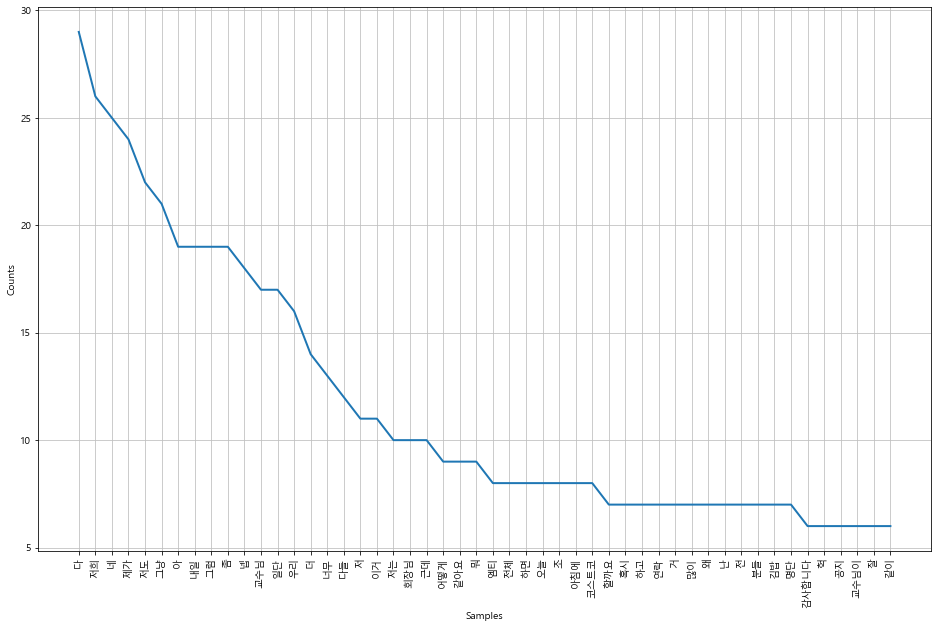

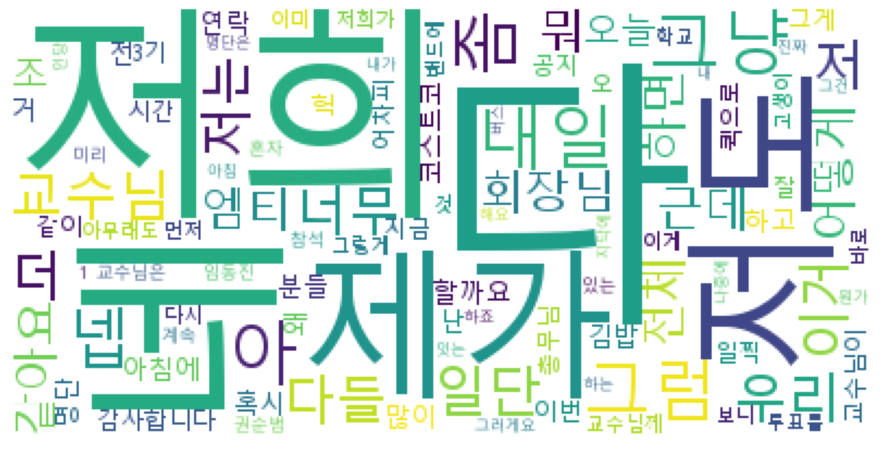

In [11]:
# 2016년 3월
time_freq_analysis(slice_03)

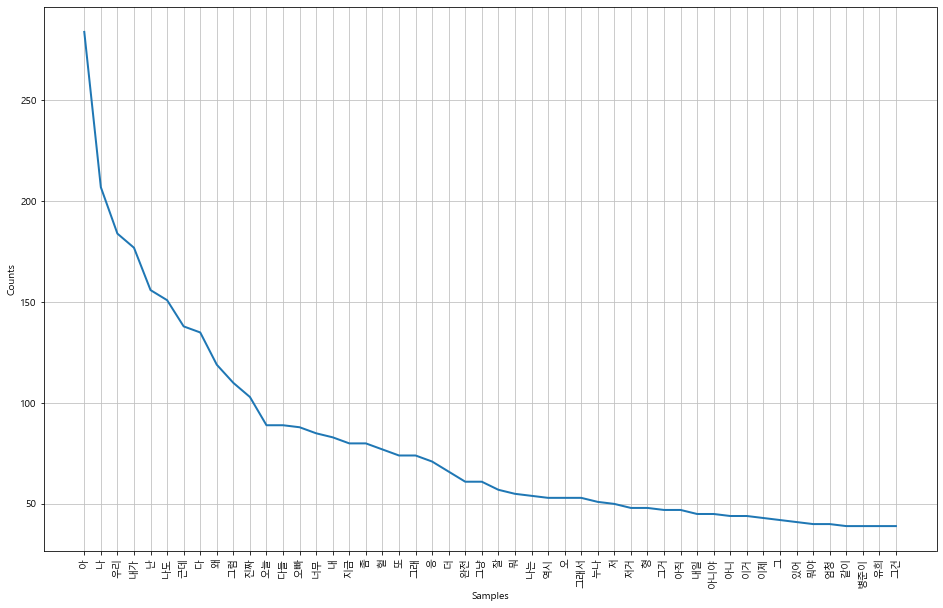

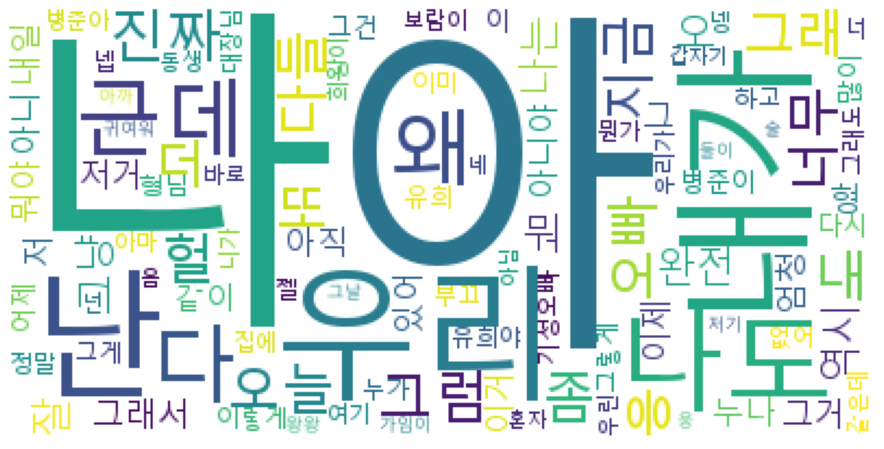

In [12]:
# 2016년 4월
time_freq_analysis(slice_04)